# Assignment - Data Visualization/Exploratory Data Analysis

# Data Collection and Data Cleaning

Importing all required packages

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import os

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_952\3512942594.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdp


In [2]:
pwd

'C:\\Users\\Lenovo'

In [3]:
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\ML project\TATAMOTORS_daily.csv')

In [4]:
#View of dataset
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2013-05-02  292.561981  297.607849  288.950714  294.194458  290.843781   
1  2013-05-03  290.830536  291.226318  281.530304  282.569153  279.350891   
2  2013-05-06  281.975525  290.236908  279.848358  287.961334  284.681641   
3  2013-05-07  289.445404  297.508911  289.445404  295.233337  291.870819   
4  2013-05-08  296.717407  302.505341  295.431213  297.063690  293.680328   

      Volume  
0  9283384.0  
1  8493169.0  
2  7899580.0  
3  5538329.0  
4  6528547.0

In [5]:
data.tail()

Date        Open        High         Low       Close   Adj Close  \
2462  2023-04-24  471.200012  476.000000  468.299988  475.200012  475.200012   
2463  2023-04-25  475.200012  476.399994  471.899994  473.549988  473.549988   
2464  2023-04-26  473.000000  479.500000  472.600006  478.200012  478.200012   
2465  2023-04-27  478.500000  482.000000  476.500000  481.600006  481.600006   
2466  2023-04-28  481.399994  488.000000  478.350006  484.950012  484.950012   

         Volume  
2462  8020593.0  
2463  6888352.0  
2464  7791425.0  
2465  7085793.0  
2466  9947813.0

Checking numerical and categorical data

In [6]:
#Check datatype
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Data type of 'Date' is object. Rest of the data is in numerical form which is appropriate

In [7]:
#shape of the dataset
data.shape

(2467, 7)

In [8]:
#some statistical information about data
data.describe()

Open         High          Low        Close    Adj Close  \
count  2465.000000  2465.000000  2465.000000  2465.000000  2465.000000   
mean    351.031399   355.948893   345.456737   350.425641   350.139083   
std     130.277717   131.343822   128.895440   130.083185   130.052371   
min      66.500000    66.900002    63.500000    65.300003    65.300003   
25%     268.950012   271.649994   261.850006   266.799988   266.684265   
50%     382.399994   388.235779   377.200012   382.052124   381.645416   
75%     448.000000   453.799988   442.100006   447.600006   447.250000   
max     600.212097   605.901123   589.873047   598.134399   597.892273   

             Volume  
count  2.465000e+03  
mean   2.239245e+07  
std    3.029998e+07  
min    0.000000e+00  
25%    6.343512e+06  
50%    1.061834e+07  
75%    2.557672e+07  
max    3.905778e+08

In [9]:
# a broader description of the data
pdp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#Checking NULL values
data.isna().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [11]:
data[data.isnull().any(axis = 1)]

Date  Open  High  Low  Close  Adj Close  Volume
222  2014-03-22   NaN   NaN  NaN    NaN        NaN     NaN
451  2015-02-28   NaN   NaN  NaN    NaN        NaN     NaN

As here we can see very less NaN rows so we are going to drop it.

In [12]:
#Dropping rows with null values
data.dropna(axis = 0,inplace = True)

In [13]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Now we can see here is no NaN values in the dataset



# Formatting data(Making datatypes compatible)


In our dataset only 'Date' are in object form which need to be changed to 'DateTime' format


In [14]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
#Again check the datatypes
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [17]:
#sort the data according to 'Date'
data.sort_values('Date',inplace = True)

In [18]:
data.head()

Date        Open        High         Low       Close   Adj Close  \
0 2013-05-02  292.561981  297.607849  288.950714  294.194458  290.843781   
1 2013-05-03  290.830536  291.226318  281.530304  282.569153  279.350891   
2 2013-05-06  281.975525  290.236908  279.848358  287.961334  284.681641   
3 2013-05-07  289.445404  297.508911  289.445404  295.233337  291.870819   
4 2013-05-08  296.717407  302.505341  295.431213  297.063690  293.680328   

      Volume  
0  9283384.0  
1  8493169.0  
2  7899580.0  
3  5538329.0  
4  6528547.0

# Univariate analysis


# Data analysis using Data Visualization

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


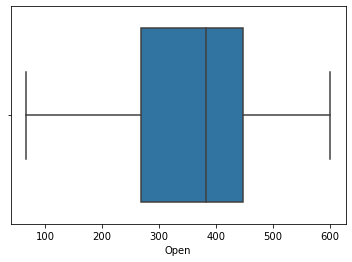

In [21]:
#boxplot to know the statistic of each column
sb.boxplot(data.Open)
plt.show()

We can see that minimum value in column 'Open' is less than 100, maximum value is near 600. 75% quartile is near 280,median is around 380 and 25% quartile is around 430-450 . There are no outliers in the 'Open' Column.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


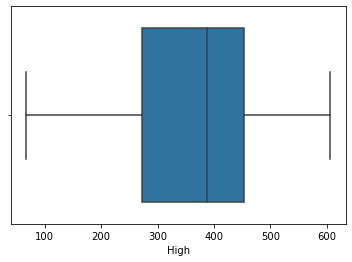

In [22]:
sb.boxplot(data['High'])
plt.show()

We can see that minimum value in column 'High' is less than 100, maximum value is near 600. 75% quartile is near 280,median is around 390 and 25% quartile is around 450-460.There are no outliers in the 'High' Column. 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


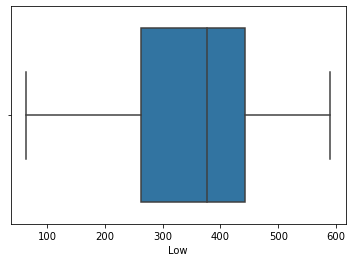

In [23]:
sb.boxplot(data.Low)
plt.show()

We can see that minimum value in column 'Low' is less than 100, maximum value is near 600. 75% quartile is near 280,median is around 390 and 25% quartile is around 440-450. There are no outliers in the 'Low' Column.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


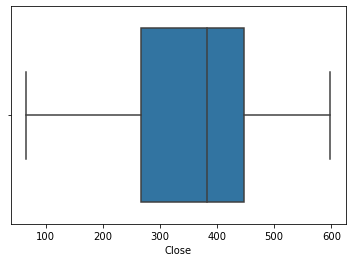

In [24]:
sb.boxplot(data.Close)
plt.show()

We can see that minimum value in column 'Close' is less than 100, maximum value is near 600. 75% quartile is near 280,median is around 390 and 25% quartile is around 440-450. There are no outliers in the 'Close' Column.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


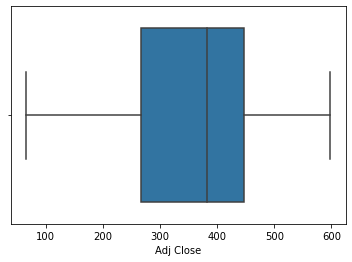

In [25]:
sb.boxplot(data['Adj Close'])
plt.show()

We can see that minimum value in column 'Adj Close' is less than 100, maximum value is near 600. 75% quartile is near 280,median is around 390 and 25% quartile is around  440-450.There are no outliers in the 'Adj Close' Column.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


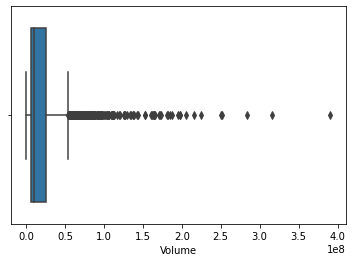

In [26]:
sb.boxplot(data['Volume'])
plt.show()

We can see that there are too many outliers in the data

# Check the distribution of data

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


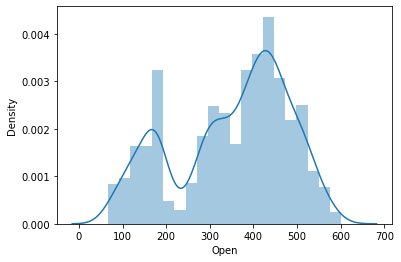

In [27]:
sb.distplot(data.Open)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


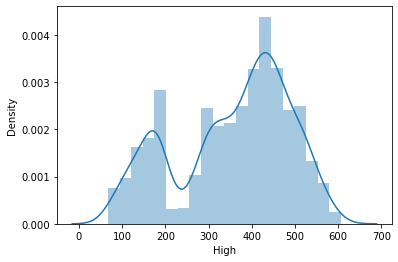

In [28]:
sb.distplot(data.High)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


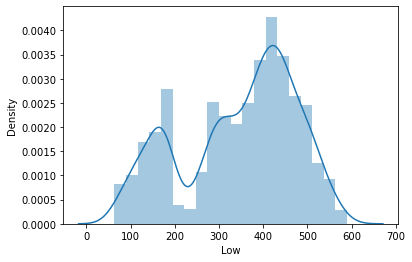

In [29]:
sb.distplot(data.Low)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


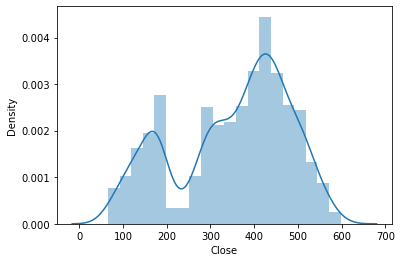

In [30]:
sb.distplot(data.Close)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


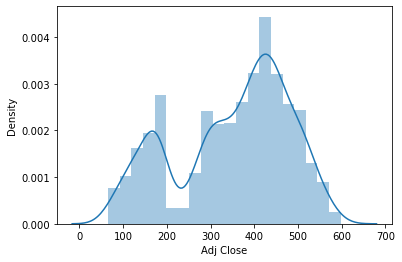

In [31]:
sb.distplot(data['Adj Close'])
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


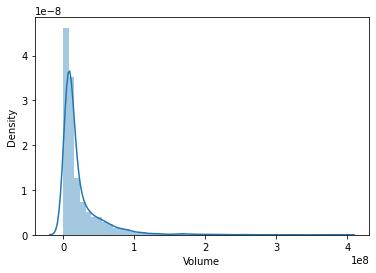

In [32]:
sb.distplot(data.Volume)
plt.show()

# Bivariate Analysis

In [33]:
#store the columns of the data in a list
columns = data.columns
#remove column of date from the list
columns = columns[1:]
columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


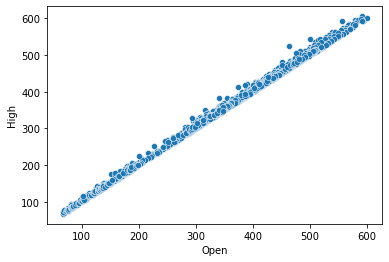

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


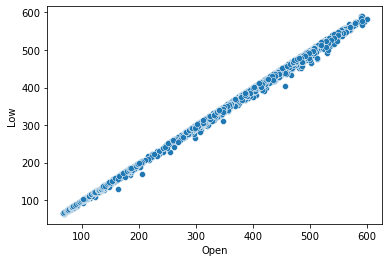

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


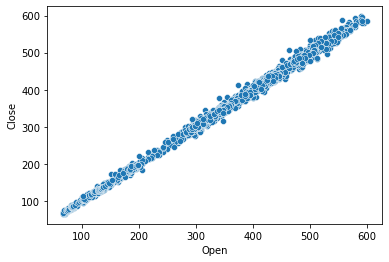

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


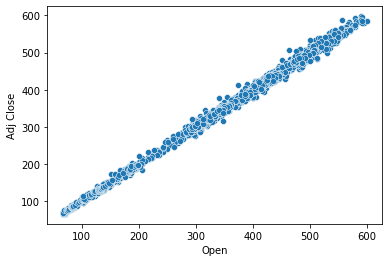

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


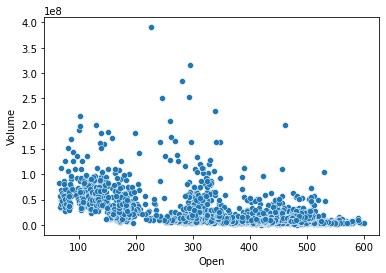

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


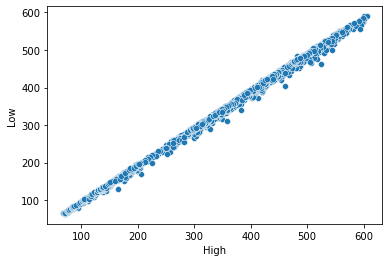

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


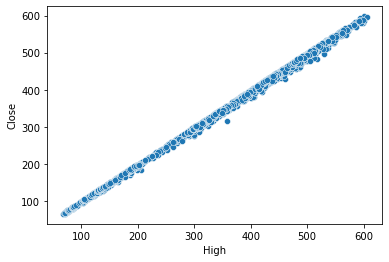

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


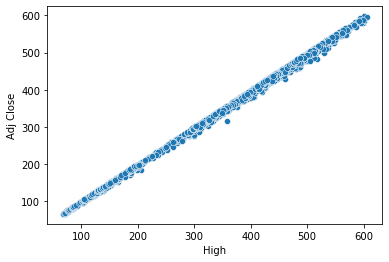

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


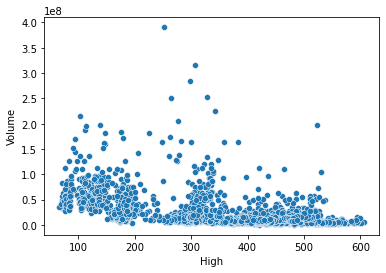

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


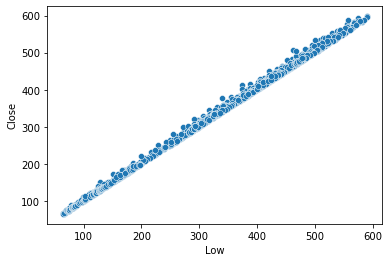

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


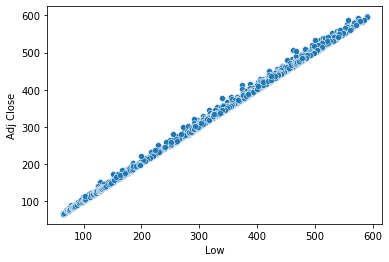

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


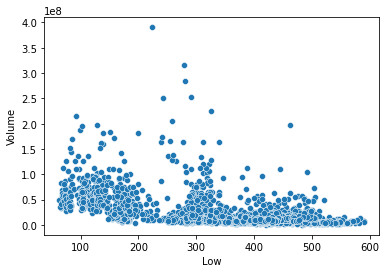

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


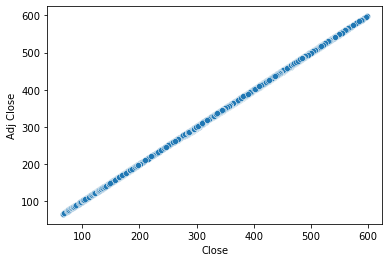

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


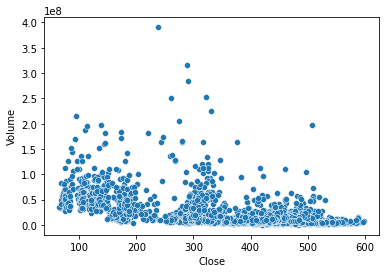

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


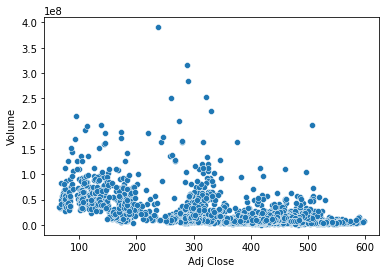

In [34]:
#plotting scatter plot between each column to know the bivariate distribution of the data
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if i == j:
            continue
        else:
            sb.scatterplot(data[columns[i]],data[columns[j]],legend = 'brief')
            plt.show()

# Checking for outliers

In [35]:
#Import required packages

In [36]:
from scipy import stats

In [37]:
# Here we use zscore to identify outliers.
# If zscore is greater than 3 or less than -3 then it will be considered as outlier

# Outliers in Column 'Open'

In [38]:
z_open = stats.zscore(data.Open)

In [39]:
#Check for minimum and maximum zscore
print(z_open.min())
print(z_open.max())

-2.184480493133666
1.9130766376152974


We can see there are no outliers in column 'Open'

# Outliers in Column 'High'

In [40]:
z_high = stats.zscore(data.High)
print(z_high.min())
print(z_high.max())

-2.2011506461026604
1.9034237072259714


It is obvious that there are no outliers in column 'High'

# Outliers in Column 'Low'

In [41]:
z_low = stats.zscore(data.Low)
print(z_low.min())
print(z_low.max())

-2.1879280395904956
1.8966218149709302


There are no outliers in column 'Low'

# Outliers in Column 'Close'

In [42]:
z_close = stats.zscore(data.Close)
print(z_close.min())
print(z_close.max())

-2.1923163172577924
1.9046198623409223


No outliers in column 'Close'

# Outliers in Column 'Adj Close'

In [43]:
z_aclose = stats.zscore(data['Adj Close'])
print(z_aclose.min())
print(z_aclose.max())

-2.19063191542907
1.9054128620993211


No outliers in column 'Adj Close'

# Outliers in Column 'Volume'

In [44]:
z_vol = stats.zscore(data.Volume)
print(z_vol.min())
print(z_vol.max())

-0.7391752744707719
12.153808260105015


There are outliers in Volume

# Removing Outliers

In our dataset,only 'Volume' column consists of outliers. So we will remove outliers from 'Volume' Column

In [45]:
z_vol = abs(z_vol)
outlier = np.where(z_vol > 3)
outlier = list(outlier[0])
print(outlier)

[1340, 1595, 1688, 1711, 1719, 1725, 1740, 1743, 1744, 1750, 1753, 1756, 1784, 1801, 1802, 1804, 1829, 1845, 1860, 1867, 1896, 1897, 1898, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1926, 1931, 1958, 1981, 2015, 2079, 2081, 2083]


In [46]:
data.shape

(2465, 7)

In [47]:
data.drop(outlier,inplace = True)

In [48]:
data.shape

(2420, 7)

We removed the rows with outliers

# Correlation Matrix to Identify Relevent Columns

In [49]:
data.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999315  0.999246  0.998532   0.998531 -0.522521
High       0.999315  1.000000  0.999220  0.999469   0.999458 -0.514207
Low        0.999246  0.999220  1.000000  0.999404   0.999394 -0.526844
Close      0.998532  0.999469  0.999404  1.000000   0.999985 -0.519180
Adj Close  0.998531  0.999458  0.999394  0.999985   1.000000 -0.518098
Volume    -0.522521 -0.514207 -0.526844 -0.519180  -0.518098  1.000000

We can see that here is a positive and high correlation among 'Open','High','Low','Close','Adj Close'. 'Volume' is negatively correlated with other columns.

# Correlation Matrix

In [50]:
corr_mat = data.corr()

<AxesSubplot:>

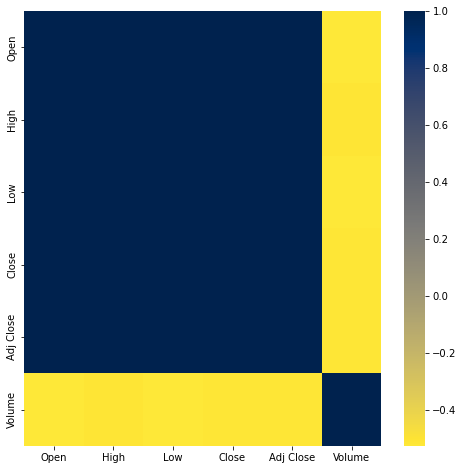

In [51]:
f,ax = plt.subplots(figsize = (8,8))
sb.heatmap(corr_mat,ax = ax,cmap = 'cividis_r')

These are highly correlated with each other

1. Open with High,Low,Close,Adj Close
2. High with Open,Low,Close,Adj Close
3. Low with Open,High,Close,Adj Close
4. Close with Open,High,Low,Adj Close
5. Adj Close with Open,High,Low,Close

Below are very less correlated

   Volume and all other columns

# Final Model

In [52]:
test_size = 0.1 #Data used for testing model
cv_size = 0.1 #Data used to select the best number of samples for predictions
max_sample = 30 #Maximum Number of days used to predict the stock price

In [53]:
from sklearn.linear_model import LinearRegression
def predictPrice(dataset,num_of_samples,offset):
    '''
    dataset : dateset with values you want to predict
    num_of_samples : number of samples used to fit the linear model
    offset : We will be doing predictions for data after the offset i.e. dataset[offset:]. in other words it is our test data
    '''
    #Create Linear Regression object
    reg = LinearRegression()
    
    #List of predicted values for different number of samples
    pred_list = []
    
    #fit the linear model and predict prices for different days
    for i in range(offset,len(dataset['Adj Close'])):
        
        #Divide the dataset into train and test part
        x_train = np.array(range(len(dataset['Adj Close'][i-num_of_samples:i]))) #converting the dates into simple indices
        y_train = np.array(dataset['Adj Close'][i-num_of_samples:i]) #Taking values of Adj_close
        
        x_train = x_train.reshape(-1,1)
        y_train = y_train.reshape(-1,1)
        #print(x_train)
        #print(y_train)
        #print('shpae x ',x_train.shape)
        #print('shpae y ',y_train.shape)
        #fit the model into the LinearRegression Object and train the model
        reg.fit(x_train,y_train)
        
        #predict the price on num_of_sample day
        pred = reg.predict(np.array(num_of_samples).reshape(-1,1))
        pred_list.append(pred[0][0])
    
    return pred_list

In [54]:
num_test = int(len(data)*test_size) #test data size
num_cv = int(len(data)*cv_size) #cross-validation data size
num_train = len(data) - num_test - num_cv #train data size


#splitting the data into train,test and cross-validation
train_data = data[:num_train].copy()
cv_data = data[num_train:num_train+num_cv].copy()
train_cv = data[:num_train + num_cv].copy()
test_data = data[num_train+num_cv:].copy()

print("Train data shape ",train_data.shape)
print("Train and CV data shape ",train_cv.shape)
print("Test data shape ",test_data.shape)
print("CV data shape ",cv_data.shape)

Train data shape  (1936, 7)
Train and CV data shape  (2178, 7)
Test data shape  (242, 7)
CV data shape  (242, 7)


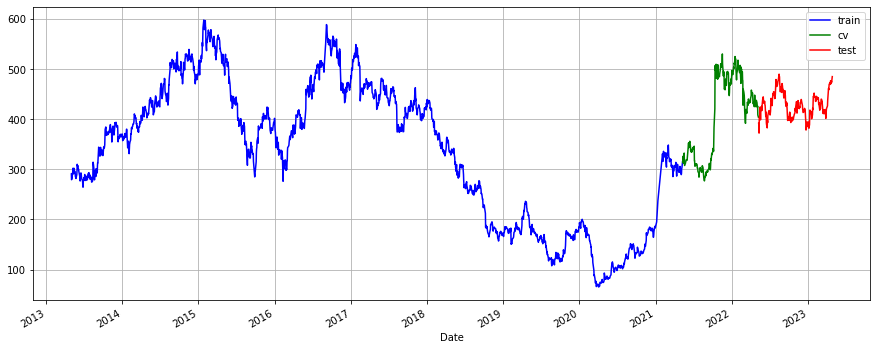

In [55]:
#A view of train,cv and test data
mpl.rcParams['figure.figsize'] = 15,6
ax = train_data.plot(x = 'Date',y = 'Adj Close',style = 'b-')
ax = cv_data.plot(x = 'Date',y = 'Adj Close',style = 'g-',ax = ax)
ax = test_data.plot(x = 'Date',y = 'Adj Close',style = 'r-',ax = ax)
plt.legend(['train','cv','test'])
plt.grid()
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
rmse = [] #list to store the root mean squared error for different samples
r2_score_err = [] #List to store the r2_score_error for different samples
#predict the price for different number of samples
for num_of_samples in range(1,max_sample+1):
    '''
    train_cv : Dataset consisting training and cross validation dataset
    num_of_samples : Number of samples used to train the model
    num_train : Size of train dataset
    
    return :Estimated price for cv dataset
    '''
    pred = predictPrice(train_cv,num_of_samples,num_train)
    #Add the current predicted value to the cv dataset
    cv_data.loc[:,'pred_for_N_'+str(num_of_samples)] = pred
    
    #Calculate the RMSE value and append it to the RMSE list
    rmse.append(mse(pred,cv_data['Adj Close'],squared = False))
    
    #Calculate the r2_score and append it to r2_score_err list
    r2_score_err.append(r2_score(pred,cv_data['Adj Close']))

In [57]:
cv_data.head()

Date        Open        High         Low       Close   Adj Close  \
1978 2021-05-11  309.549988  320.750000  308.100006  315.549988  315.549988   
1979 2021-05-12  318.250000  334.750000  316.250000  326.000000  326.000000   
1980 2021-05-14  329.350006  329.500000  310.000000  312.250000  312.250000   
1982 2021-05-18  325.950012  336.649994  324.000000  332.450012  332.450012   
1983 2021-05-19  313.000000  322.950012  312.100006  314.450012  314.450012   

           Volume  pred_for_N_1  pred_for_N_2  pred_for_N_3  ...  \
1978   58472304.0    314.850006    326.950012    319.883341  ...   
1979  111584920.0    315.549988    316.249970    323.849986  ...   
1980   81305325.0    326.000000    336.450012    329.949992  ...   
1982   86153088.0    312.250000    298.500000    314.633341  ...   
1983  119407026.0    332.450012    352.650024    330.016683  ...   

      pred_for_N_21  pred_for_N_22  pred_for_N_23  pred_for_N_24  \
1978     298.049050     297.556496     297.422730     297.113408   
1979     301.808095     301.036364     300.426877     300.168298   
1980     308.120477     306.320129     305.390712     304.625725   
1982     308.640715     309.506495     307.751778     306.818116   
1983     314.426670     313.540912     314.180833     312.332973   

      pred_for_N_25  pred_for_N_26  pred_for_N_27  pred_for_N_28  \
1978     297.364003     297.955849     298.507268     299.750797   
1979     299.750500     299.878001     300.344303     300.782938   
1980     304.207001     303.646308     303.619517     303.930954   
1982     306.038000     305.588462     305.002707     304.931350   
1983     311.272003     310.364156     309.780772     309.073812   

      pred_for_N_29  pred_for_N_30  
1978     300.177095     299.671036  
1979     301.899632     302.239081  
1980     304.228080     305.191611  
1982     305.189533     305.438507  
1983     308.869707     308.992762  

[5 rows x 37 columns]

In [58]:
print(rmse)

[12.192241760124759, 17.095046557059028, 14.53663138064475, 15.008825116265221, 15.238015859870432, 15.732288673912867, 16.115141917262832, 16.727541150440057, 17.265256814774737, 17.766302874861815, 18.335011205309414, 18.878705735003354, 19.45278398439609, 20.051795611807503, 20.629460472852504, 21.13340190348977, 21.63039071992056, 22.06164002286074, 22.445385352783436, 22.804759216382646, 23.13193316079586, 23.457303815361676, 23.788735891052422, 24.110366443822905, 24.4457729112449, 24.825319297658627, 25.221992618993507, 25.658600943169866, 26.07267328499288, 26.53281075425361]


# Graph of RMSE vs num_of_samples

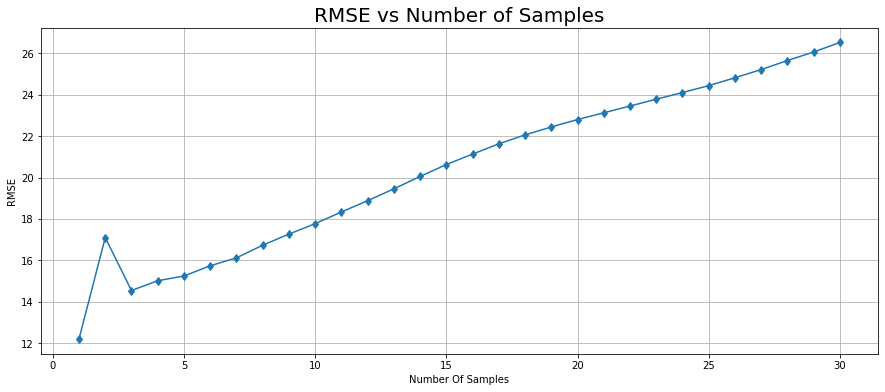

In [59]:
x = np.arange(1,max_sample+1)
plt.plot(x,rmse,'d-')
plt.xlabel("Number Of Samples")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of Samples",size = 20)
plt.grid()
plt.show()


# Graph of r2_score vs num_of_samples

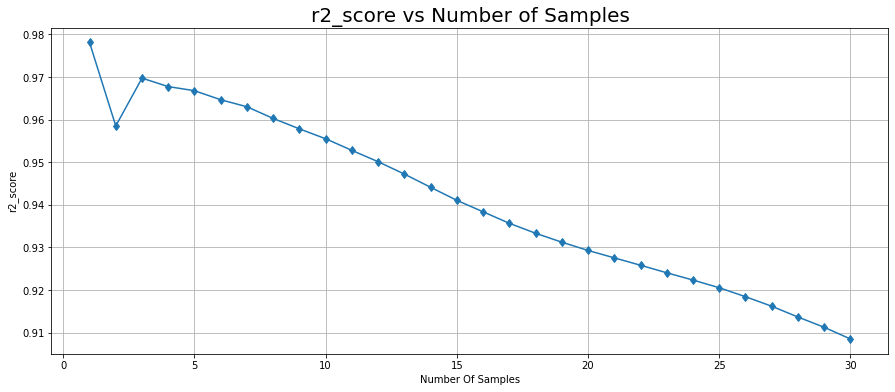

In [60]:
plt.plot(x,r2_score_err,'d-')
plt.xlabel("Number Of Samples")
plt.ylabel("r2_score")
plt.title("r2_score vs Number of Samples",size = 20)
plt.grid()
plt.show()

1. It is observed from the analysis that the minimum 'root_mean_squared_error' and maximum r2_score is obtained when we take the number of samples = 1.
2. Next minimum rmse and maximum r2_score is obtained from 3 to 4.
3. Since we are usign Linear Regression, hence we will take the number of samples = 5.(wii be updated later)

# Graph between actual value and predicted value for num_of_samples = 5

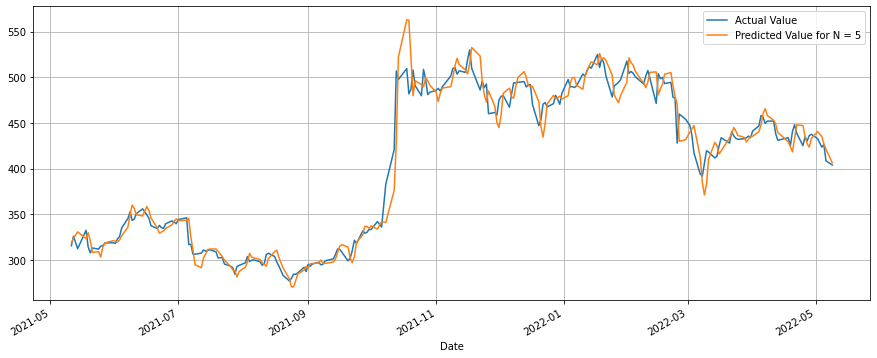

In [68]:
ax = cv_data.plot(x='Date',y='Adj Close')
ax = cv_data.plot(x='Date',y='pred_for_N_5',ax = ax)
plt.grid()
plt.legend(['Actual Value','Predicted Value for N = 5'])
plt.show()

# Predictions on Test data

In [69]:
num_of_samples = 5
pred = predictPrice(data,num_of_samples,num_train+num_cv)
test_data.loc[:,"Predicted Adj Close"] = pred

In [70]:
test_data.head()

Date        Open        High         Low       Close   Adj Close  \
2225 2022-05-10  400.000000  408.500000  389.600006  391.750000  391.750000   
2226 2022-05-11  396.000000  397.000000  377.549988  388.149994  388.149994   
2227 2022-05-12  382.000000  384.649994  366.200012  372.299988  372.299988   
2228 2022-05-13  387.000000  419.350006  387.000000  404.299988  404.299988   
2229 2022-05-16  411.899994  411.899994  396.250000  405.350006  405.350006   

          Volume  Predicted Adj Close  
2225  16540303.0           397.204999  
2226  29215175.0           385.055005  
2227  33511538.0           375.810004  
2228  71425747.0           366.449991  
2229  24938704.0           386.464978

In [71]:
#root_mean_squared_error
rmse = mse(test_data['Adj Close'],pred)

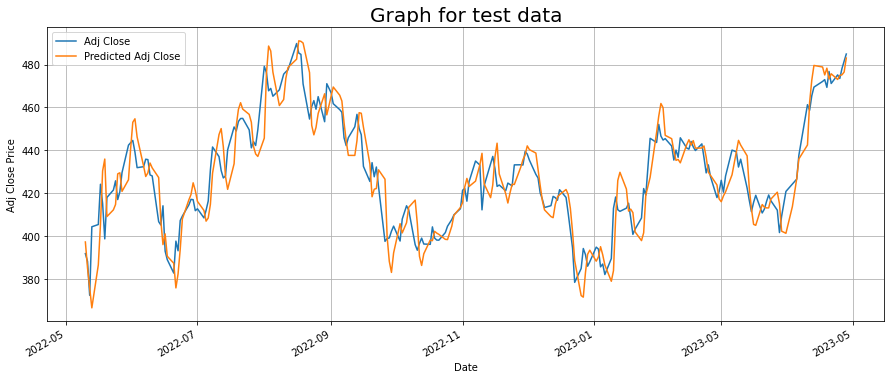

In [72]:
#Visualization on test data and predicted value
ax = test_data.plot(x='Date',y='Adj Close')
ax = test_data.plot(x='Date',y='Predicted Adj Close',ax = ax)
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Graph for test data",size = 20)
plt.show()

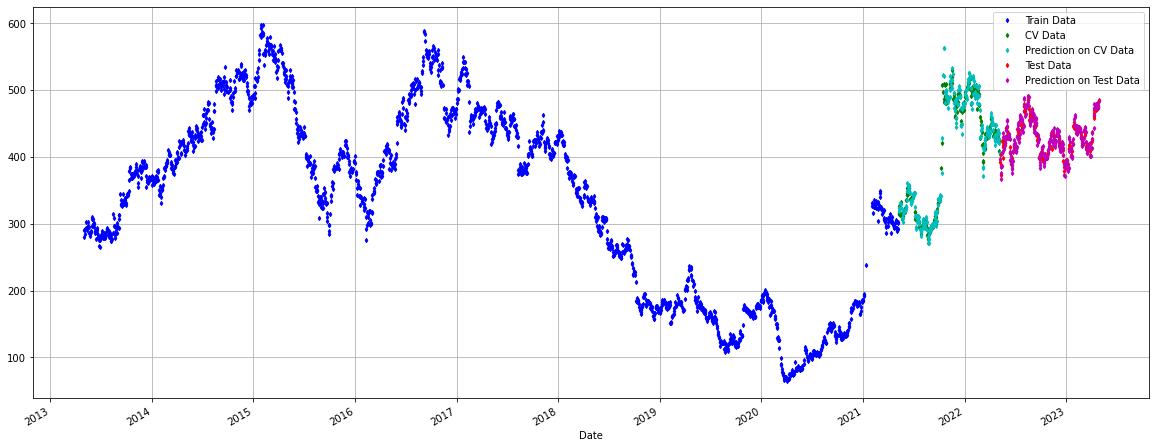

In [73]:
mpl.rcParams['figure.figsize'] = 20,8
ax = train_data.plot(x = 'Date',y = 'Adj Close',style = 'bd',markersize = 3)
ax = cv_data.plot(x = 'Date',y = 'Adj Close',style = 'gd',ax = ax,markersize = 3)
ax = cv_data.plot(x = 'Date',y = 'pred_for_N_5',style = 'cd',ax = ax,markersize = 3)
ax = test_data.plot(x = 'Date',y = 'Adj Close',style = 'rd',ax = ax,markersize = 3)
ax = test_data.plot(x = 'Date',y = 'Predicted Adj Close',style = 'md',ax = ax,markersize = 3)
plt.legend(['Train Data','CV Data','Prediction on CV Data','Test Data','Prediction on Test Data'])
plt.grid()
plt.show()

# Predictions for a specific day

In [ ]:
from tkinter import *

class Placeholder_State(object):
     __slots__ = 'normal_color', 'normal_font', 'placeholder_text', 'placeholder_color', 'placeholder_font', 'with_placeholder'

def add_placeholder_to(entry, placeholder, color="grey", font=None):
    normal_color = entry.cget("fg")
    normal_font = entry.cget("font")
    
    if font is None:
        font = normal_font

    state = Placeholder_State()
    state.normal_color=normal_color
    state.normal_font=normal_font
    state.placeholder_color=color
    state.placeholder_font=font
    state.placeholder_text = placeholder
    state.with_placeholder=True

    def on_focusin(event, entry=entry, state=state):
        if state.with_placeholder:
            entry.delete(0, "end")
            entry.config(fg = state.normal_color, font=state.normal_font)
        
            state.with_placeholder = False

    def on_focusout(event, entry=entry, state=state):
        if entry.get() == '':
            entry.insert(0, state.placeholder_text)
            entry.config(fg = state.placeholder_color, font=state.placeholder_font)
            
            state.with_placeholder = True

    entry.insert(0, placeholder)
    entry.config(fg = color, font=font)

    entry.bind('<FocusIn>', on_focusin, add="+")
    entry.bind('<FocusOut>', on_focusout, add="+")
    
    entry.placeholder_state = state

    return state

main_window = Tk()
main_window.geometry('500x280')
main_window.title('Stock Market Price Predictor')

def openResultWindow():
    
    date = e1.get()
    
    max_samples = int(e2.get())
        
    try:
        text.set('')
        date = pd.to_datetime(date)

        if(max_samples < 0 or max_samples >30):
            raise Exception()
            
        result_window = Toplevel(main_window)
        height = max_samples
        width = 400

        if height <= 5 :
            size = str(width)+"x"+str(130)
        else :
            size = str(width)+"x"+str(30+int(height*20))

        result_window.geometry(size)
        result_window.title('Predicted Result')
        lbl5 = Label(result_window, text='PREDICTED RESULT')
        lbl5.grid(row=3,column=0,columnspan=3,pady=20)

        #Take the dataset before the date
        df = data[data.Date < date]
        offset = np.where(data.Date < date)
        offset = offset[-1][-1]
        #print(offset)
        #print(data.iloc[offset])

        #if max_samples < 5 
        if(max_samples < 5):
            max_samples = 5

        #predic the prices for given number of samples
        pred_list = []
        for num_of_samples in range(5,max_samples+1):
            pred = predictPrice(df,num_of_samples,offset)
            pred_list.append(pred)

        result_list = []

        for day in range(len(pred_list)):
            result_list.append(pred_list[day])
            result_text = "Predictions using "+str(5+day)+" days is "+str(pred_list[day])
            Label(result_window, text=result_text).grid(row=4+day,column=0)

        bestResult_value = max(result_list)

        for i in range(len(result_list)):
            if(bestResult_value == result_list[i]) :
                bestResult_days = i

        bestResult_text = "Highest Predicted Value is using "+str(5+bestResult_days)+" days and Value is "+str(bestResult_value)
        Label(result_window, text=bestResult_text).grid(row=5+max_samples,column=0)

        result_window.mainloop()
        
    except:
        if(max_samples < 0 or max_samples >30):
            text.set('Enter the number within specified range!!!')
        else:
            text.set('Enter the date in the specified format!!!')
        resetAllEntry()
    
    
def resetAllEntry():
    e1.delete(0,END)
    add_placeholder_to(e1,'yyyy-mm-dd')
    e2.delete(0,END)
    add_placeholder_to(e2,'number<=30')
    
    

    
    
    
lbl1 = Label(main_window, text='STOCK MARKET PRICE PREDICTOR')
lbl1.grid(row=3,column=0,columnspan=3,pady=20)
lbl2 = Label(main_window, text='Enter Date : * ')
lbl2.grid(row=5,column=0,columnspan=2,padx=10,pady=10) 
lbl3 = Label(main_window, text='Enter Number of Days to be used for predictions : * ')
lbl3.grid(row=7,column=0,columnspan=2,padx=10,pady=10) 
e1 = Entry(main_window)
e1.grid(row=5,column=2,padx=10)
add_placeholder_to(e1,'yyyy-mm-dd')
e2 = Entry(main_window)
e2.grid(row=7,column=2,padx=10)
add_placeholder_to(e2,'number<=30')
b1 = Button(main_window, text='Predict', width=25,command=openResultWindow)
b1.grid(row=9,column=1,pady=10)
b2 = Button(main_window, text='Reset', width=25,command=resetAllEntry)
b2.grid(row=9,column=2,pady=10)
lbl4 = Label(main_window, text='* Denotes Mandatory Fields')
lbl4.grid(row=11,column=0,columnspan=3,padx=10,pady=10) 
text = StringVar()
lbl6 = Label(main_window, textvariable = text)
text.set('')
lbl6.grid(row=13,column=0,columnspan=3,padx=10,pady=10) 
main_window.mainloop()
 